In [48]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder


In [49]:
df = pd.read_parquet("./../data/bts_faa_sample_1_42.parquet")

In [ ]:
# WN    Southwest Airlines Co.
# DL    Delta Air Lines, Inc.
# AA    American Airlines Inc.
# OO    SkyWest Airlines
# UA    United Airlines, Inc.
# YX    Republic Airways Inc
# MQ    Envoy Air Inc.
# B6    Jetblue Airways Corporation
# OH    PSA Airlines, Inc.
# AS    Alaska Airlines Inc.
# 9E    Endeavor Air
# YV    Mesa Airlines, Inc.
# NK    Spirit Airlines
# F9    Frontier Airlines, Inc.
# EV    Tatonduk Outfitters Limited dba Eve Air Alaska dba Everts Air Cargo
# G4    Allegiant Air LLC
# HA    Hawaiian Airlines, Inc.

In [108]:
df.value_counts('Reporting_Airline')

# WN    110002    Southwest Airlines Co.
# DL     74869    Delta Air Lines, Inc.
# AA     72517    American Airlines Inc.
# OO     59448    SkyWest Airlines
# UA     46876    United Airlines, Inc.
# B6     22379    Jetblue Airways Corporation
# EV     18142    Tatonduk Outfitters Limited dba Eve Air Alaska dba Everts Air Cargo
# MQ     17746    Envoy Air Inc.
# AS     17337    Alaska Airlines Inc.
# YX     16952    Republic Airways Inc
# NK     15048    Spirit Airlines
# 9E     13185    Endeavor Air
# OH     12948    PSA Airlines, Inc.
# F9     10373    Frontier Airlines, Inc.
# YV      8748    Mesa Airlines, Inc.
# HA      6091    Hawaiian Airlines, Inc.
# G4      6049    Allegiant Air LLC
# VX      2274
# QX      2077    Horizon Air Industries, Inc.
# US      2058

Reporting_Airline
WN    110002
DL     74869
AA     72517
OO     59448
UA     46876
B6     22379
EV     18142
MQ     17746
AS     17337
YX     16952
NK     15048
9E     13185
OH     12948
F9     10373
YV      8748
HA      6091
G4      6049
VX      2274
QX      2077
US      2058
Name: count, dtype: int64

In [8]:
list(df.columns)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Reporting_Airline',
 'Tail_Number',
 'Flight_Number_Reporting_Airline',
 'OriginCityMarketID',
 'Origin',
 'DestCityMarketID',
 'Dest',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'DivAirportLandings',
 'N-NUMBER',
 'SERIAL NUMBER',
 'MFR MDL CODE',
 'ENG MFR MDL',
 'YEAR MFR',
 'TYPE REGISTRANT',
 'NAME',
 'STREET',
 'STREET2',
 'CITY',
 'STATE',
 'ZIP CODE',
 'REGION',
 'COUNTY',
 'COUNTRY',
 'LAST ACTION DATE',
 'CERT ISSUE DATE',
 'CERTIFICATION',
 'TYP

In [10]:
correlation_matrix = df.corr(numeric_only=True)

In [12]:
correlation_matrix

,Year,Quarter,Month,DayofMonth,DayOfWeek,Flight_Number_Reporting_Airline,OriginCityMarketID,DepDelay,DepDelayMinutes,DepDel15,...,AC-CAT,BUILD-CERT-IND,NO-ENG,NO-SEATS,SPEED,faa_registration_origin,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE
Year,1.000000,-0.092291,-0.089001,-0.001702,0.009725,0.062413,0.008411,0.014563,0.017007,0.012927,...,-0.005708,0.104849,0.010141,0.082294,-4.344328e-02,0.262639,-0.005195,0.009759,-0.002719,0.012040
Quarter,-0.092291,1.000000,0.970862,0.011870,0.005268,0.006105,-0.003998,-0.002342,-0.002831,-0.003815,...,0.000359,-0.004415,-0.004314,-0.002475,1.063855e-02,0.007461,0.012271,-0.006965,0.011483,-0.005550
Month,-0.089001,0.970862,1.000000,0.011748,0.004523,0.006949,-0.004383,-0.001194,-0.001918,-0.001595,...,-0.000623,-0.003902,-0.004349,-0.001251,1.045751e-02,0.009116,0.012496,-0.007137,0.011180,-0.006165
DayofMonth,-0.001702,0.011870,0.011748,1.000000,-0.001732,0.003792,0.000943,0.002061,0.001758,0.001667,...,0.001643,-0.000055,0.000713,-0.001382,-1.079128e-04,0.001325,-0.000131,-0.000139,-0.000954,-0.000659
DayOfWeek,0.009725,0.005268,0.004523,-0.001732,1.000000,0.031347,0.003685,0.005888,0.005045,0.007570,...,-0.000849,0.000560,0.000312,0.009269,-1.764716e-03,0.001510,-0.007786,-0.005797,-0.009565,-0.005690
Flight_Number_Reporting_Airline,0.062413,0.006105,0.006949,0.003792,0.031347,1.000000,0.024001,-0.004616,0.001185,-0.020889,...,-0.004866,-0.055228,0.014021,-0.512989,-2.106630e-02,0.056599,0.097691,0.110700,0.099241,0.113910
OriginCityMarketID,0.008411,-0.003998,-0.004383,0.000943,0.003685,0.024001,1.000000,-0.010671,-0.003991,-0.019761,...,0.001120,0.004716,0.003359,-0.017921,-3.357321e-03,0.020549,-0.107592,-0.154566,-0.003270,-0.090312
DepDelay,0.014563,-0.002342,-0.001194,0.002061,0.005888,-0.004616,-0.010671,1.000000,0.996987,0.583377,...,0.000016,0.006221,-0.000774,0.020976,-2.755143e-03,-0.000057,-0.009221,0.026838,-0.005368,0.023000
DepDelayMinutes,0.017007,-0.002831,-0.001918,0.001758,0.005045,0.001185,-0.003991,0.996987,1.000000,0.564371,...,-0.000053,0.003794,-0.000643,0.012935,-2.788568e-03,0.000862,-0.006092,0.026026,-0.000390,0.022827
DepDel15,0.012927,-0.003815,-0.001595,0.001667,0.007570,-0.020889,-0.019761,0.583377,0.564371,1.000000,...,-0.000200,0.015229,-0.001145,0.032105,-1.017803e-03,-0.001232,-0.017473,0.021022,-0.006197,0.017197


In [11]:
highly_correlated_set = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_set.add(colname)

highly_correlated_set

Highly Correlated Features: {'Month', 'ArrDelayMinutes', 'ArrDelay', 'ActualElapsedTime', 'AirTime', 'DepDelayMinutes', 'Distance'}


In [3]:
# Select numerical and categorical columns
numerical_cols = [
    "Year",
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "Flight_Number_Reporting_Airline",
    #  'OriginCityMarketID',
    #  'DestCityMarketID',
    "CRSDepTime",
    #  'DepTime',
    #  'DepDelay',
    #  'DepDelayMinutes',
    #  'DepDel15',
    #  'DepartureDelayGroups',
    #  'WheelsOff',
    #  'WheelsOn',
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    #  'ArrTime',
    #  'ArrDelay',
    #  'ArrDelayMinutes',
    #  'ArrDel15',
    #  'ArrivalDelayGroups',
    "Cancelled",  # Filter for == 0
    "Diverted",
    "CRSElapsedTime",
    #  'ActualElapsedTime',
    #  'AirTime',
    #  'Flights', all equal 1
    "Distance",
    #  'DistanceGroup', too highly correlated with distance
    #  'CarrierDelay',
    #  'WeatherDelay',
    #  'NASDelay',
    #  'SecurityDelay',
    #  'LateAircraftDelay',
    "MFR MDL CODE",
    "ENG MFR MDL",
    "YEAR MFR",
    "TYPE REGISTRANT",
    "TYPE AIRCRAFT",
    "TYPE ENGINE",
    "AIR WORTH DATE",
    "TYPE",
    "HORSEPOWER",
    "THRUST",
    "TYPE-ACFT",
    "TYPE-ENG",
    "NO-ENG",
    "NO-SEATS",
    "SPEED",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]
categorical_cols = [
    "FlightDate",
    "Reporting_Airline",
    "Tail_Number",
    "Origin",
    "Dest",
    "NAME",
    "MFR",
    "MODEL",
    "MFR_aircraft",
    "MODEL_aircraft",
    "AC-WEIGHT",
    "Origin_DISPLAY_AIRPORT_NAME",
    "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL",
    "Dest_DISPLAY_AIRPORT_NAME",
    "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL",
]
#  'DepTimeBlk',
#  'ArrTimeBlk',
#  'CancellationCode',
#  'DivAirportLandings',
# 0	Flight is not Diverted
# 1	One Diverted Airport Landing
# 2	Two Diverted Airport Landings
# 3	Three Diverted Airport Landings
# 4	Four Diverted Airport Landings
# 5	Five Diverted Airport Landings
# 9	Air Return to Origin Airport where the Flight was Ultimately Cancelled
# ==================================================
#  'N-NUMBER',
#  'SERIAL NUMBER',
#  'STREET',
#  'STREET2',
#  'CITY',
#  'STATE',
#  'ZIP CODE',
#  'REGION',
#  'COUNTY',
#  'COUNTRY',
#  'LAST ACTION DATE',
#  'CERT ISSUE DATE',
#  'CERTIFICATION',
#  'STATUS CODE',
#  'MODE S CODE',
#  'FRACT OWNER',
#  'OTHER NAMES(1)',
#  'OTHER NAMES(2)',
#  'OTHER NAMES(3)',
#  'OTHER NAMES(4)',
#  'OTHER NAMES(5)',
#  'EXPIRATION DATE',
#  'UNIQUE ID',
#  'KIT MFR',
#  ' KIT MODEL',
#  'MODE S CODE HEX',
#  'CODE',
#  'CODE_aircraft',


#  'AC-CAT',
#  'BUILD-CERT-IND',


#  'TC-DATA-SHEET',
#  'TC-DATA-HOLDER',
#  'faa_registration_origin',

In [80]:
numerical_cols = [
    "Year",
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "FlightDate",
    "CRSDepTime",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "Diverted",
    "CRSElapsedTime",
    "Distance",
    "YEAR MFR",
    "AIR WORTH DATE",
    "HORSEPOWER",
    "THRUST",
    "NO-ENG",
    "NO-SEATS",
    "SPEED",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

categorical_cols = [
    "Reporting_Airline",
    "Tail_Number",
    "Flight_Number_Reporting_Airline",
    "Origin",
    "Dest",
    "ENG MFR MDL",
    "TYPE REGISTRANT",
    "TYPE AIRCRAFT",
    "TYPE ENGINE",
    "NAME",
    "MFR",
    "MODEL",
    "TYPE",
    "TYPE-ENG",
    "MFR_aircraft",
    "MODEL_aircraft",
    "AC-WEIGHT",
    "Origin_DISPLAY_AIRPORT_NAME",
    "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL",
    "Dest_DISPLAY_AIRPORT_NAME",
    "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL",
]

df_sample = df[df["Cancelled"].eq(0)]

df_sample = df_sample[numerical_cols + categorical_cols]

df_sample["FlightDate"] = pd.to_datetime(df_sample["FlightDate"]).astype(int)

df_sample
# .iloc[:, len(numerical_cols):]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,CRSDepTime,TaxiOut,TaxiIn,CRSArrTime,...,MODEL,TYPE,TYPE-ENG,MFR_aircraft,MODEL_aircraft,AC-WEIGHT,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL
0,2017,1,3,29,3,1490745600000000000,1730,15,5,1900,...,CFM56-7B24,5,5.0,BOEING,737-7H4,CLASS 3,San Francisco International,"San Francisco, CA",San Diego International,"San Diego, CA"
1,2019,4,12,7,6,1575676800000000000,0625,11,5,0755,...,CFM56-7B27E/F,5,5.0,BOEING,737-800,CLASS 3,Orlando International,"Orlando, FL",St Louis Lambert International,"St. Louis, MO"
2,2019,4,11,1,5,1572566400000000000,2035,14,6,2341,...,V2533-A5,5,5.0,AIRBUS,A321-231,CLASS 3,Miami International,"Miami, FL",San Francisco International,"San Francisco, CA"
3,2015,1,1,21,3,1421798400000000000,1720,11,10,1910,...,CFM56-7B27E,5,5.0,BOEING,737-8H4,CLASS 3,William P Hobby,"Houston, TX",Los Angeles International,"Los Angeles, CA"
4,2019,2,4,19,5,1555632000000000000,1815,15,4,1820,...,CFM56-7B24E,5,5.0,BOEING,737-7H4,CLASS 3,Cincinnati/Northern Kentucky International,"Cincinnati, OH",Chicago Midway International,"Chicago, IL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535114,2015,2,4,20,1,1429488000000000000,0700,18,3,1028,...,CF34-10E6,5,5.0,EMBRAER,ERJ 190-100 IGW,CLASS 2,Logan International,"Boston, MA",Dallas/Fort Worth International,"Dallas/Fort Worth, TX"
535115,2018,3,7,1,7,1530403200000000000,1240,26,7,1815,...,LEAP-1A26,5,4.0,AIRBUS,A320-251N,CLASS 3,San Francisco International,"San Francisco, CA",Des Moines International,"Des Moines, IA"
535116,2016,3,9,5,1,1473033600000000000,1620,12,8,1805,...,None,None,NaN,None,None,None,Jacksonville International,"Jacksonville, FL",Dallas/Fort Worth International,"Dallas/Fort Worth, TX"
535117,2018,2,6,29,5,1530230400000000000,1352,16,7,2237,...,V2533-A5,5,5.0,AIRBUS INDUSTRIE,A321-231,CLASS 3,San Francisco International,"San Francisco, CA",Logan International,"Boston, MA"


In [78]:
# "ENG MFR MDL"
# "TYPE REGISTRANT"
# "TYPE AIRCRAFT"
# "TYPE ENGINE"
# "NAME"
# "MFR"
# "MODEL"
# "TYPE"
# "TYPE-ENG"
# "MFR_aircraft"
# "MODEL_aircraft"
# "AC-WEIGHT"

df_sample["ENG MFR MDL"] = df_sample["ENG MFR MDL"].replace(r'^\s*$', np.nan, regex=True)

df_sample.sort_values("ENG MFR MDL").iloc[:, len(numerical_cols):]

,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,Dest,ENG MFR MDL,TYPE REGISTRANT,TYPE AIRCRAFT,TYPE ENGINE,NAME,...,MODEL,TYPE,TYPE-ENG,MFR_aircraft,MODEL_aircraft,AC-WEIGHT,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL
116432,WN,663SW,4446,OAK,ABQ,0,None,5,5,WELLS FARGO BANK NORTHWEST NA TRUSTEE ...,...,None,None,5.0,BOEING,737-3Q8,CLASS 3,Metro Oakland International,"Oakland, CA",Albuquerque International Sunport,"Albuquerque, NM"
428077,WN,663SW,162,MEM,DAL,0,None,5,5,WELLS FARGO BANK NORTHWEST NA TRUSTEE ...,...,None,None,5.0,BOEING,737-3Q8,CLASS 3,Memphis International,"Memphis, TN",Dallas Love Field,"Dallas, TX"
34758,WN,663SW,9,HOU,HRL,0,None,5,5,WELLS FARGO BANK NORTHWEST NA TRUSTEE ...,...,None,None,5.0,BOEING,737-3Q8,CLASS 3,William P Hobby,"Houston, TX",Valley International,"Harlingen/San Benito, TX"
160827,WN,663SW,2566,PHX,TUL,0,None,5,5,WELLS FARGO BANK NORTHWEST NA TRUSTEE ...,...,None,None,5.0,BOEING,737-3Q8,CLASS 3,Phoenix Sky Harbor International,"Phoenix, AZ",Tulsa International,"Tulsa, OK"
97218,WN,663SW,1866,SAN,TUS,0,None,5,5,WELLS FARGO BANK NORTHWEST NA TRUSTEE ...,...,None,None,5.0,BOEING,737-3Q8,CLASS 3,San Diego International,"San Diego, CA",Tucson International,"Tucson, AZ"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535095,AS,251AK,1254,PDX,AUS,NaN,3,5,5,ALASKA AIRLINES INC ...,...,None,None,5.0,BOEING,737-990ER,CLASS 3,Portland International,"Portland, OR",Austin - Bergstrom International,"Austin, TX"
535102,AA,3JYAA,2330,DFW,ORD,None,None,None,None,None,...,None,None,NaN,None,None,None,Dallas/Fort Worth International,"Dallas/Fort Worth, TX",Chicago O'Hare International,"Chicago, IL"
535106,WN,799SW,801,DCA,IND,NaN,3,5,5,WILMINGTON TRUST CO TRUSTEE ...,...,None,None,5.0,BOEING,737-7Q8,CLASS 3,Ronald Reagan Washington National,"Washington, DC",Indianapolis International,"Indianapolis, IN"
535110,AA,664AA,1880,PBI,DCA,NaN,None,,,CANCELLED/NOT ASSIGNED ...,...,None,None,NaN,None,None,None,Palm Beach International,"West Palm Beach/Palm Beach, FL",Ronald Reagan Washington National,"Washington, DC"


In [103]:
label_encoder = LabelEncoder()

for col in df_sample.columns:
    df_sample[col] = df_sample[col].replace(r'^\s*$', 0, regex=True)
    df_sample[col] = df_sample[col].replace(np.NaN, 0)

for col in categorical_cols:
    df_sample[col] = label_encoder.fit_transform(df_sample[col])

    # "YEAR MFR",
    # "AIR WORTH DATE",
# df_sample.sort_values("AIR WORTH DATE").iloc[:2, 10:]["AIR WORTH DATE"]#.replace(r'^\s*$', np.nan, regex=True)

In [104]:
numerical_data = df_sample[numerical_cols].to_numpy()
categorical_data = df_sample[categorical_cols].astype(str).to_numpy()

data = np.concatenate((numerical_data, categorical_data), axis=1)


# Indices of categorical columns
cat_cols_idx = list(range(len(numerical_cols), data.shape[1] ))

In [98]:
data

array([[2017, 1, 3, ..., '305', '306', '303'],
       [2019, 4, 12, ..., '256', '333', '332'],
       [2019, 4, 11, ..., '219', '307', '304'],
       ...,
       [2016, 3, 9, ..., '167', '76', '85'],
       [2018, 2, 6, ..., '305', '193', '41'],
       [2015, 4, 11, ..., '62', '256', '361']], dtype=object)

In [105]:
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=10)
clusters = kproto.fit_predict(data, categorical=cat_cols_idx)

df_sample["Cluster"] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 84703, ncost: 1.9940143625715696e+38
Run: 1, iteration: 2/10, moves: 57267, ncost: 1.731467717852539e+38
Run: 1, iteration: 3/10, moves: 46507, ncost: 1.5850688434244156e+38
Run: 1, iteration: 4/10, moves: 35920, ncost: 1.5031813067301274e+38
Run: 1, iteration: 5/10, moves: 26828, ncost: 1.4589328928716752e+38
Run: 1, iteration: 6/10, moves: 21364, ncost: 1.4311031410059199e+38
Run: 1, iteration: 7/10, moves: 17799, ncost: 1.4117724712483476e+38
Run: 1, iteration: 8/10, moves: 14801, ncost: 1.3982865936091418e+38
Run: 1, iteration: 9/10, moves: 12543, ncost: 1.3882937743353479e+38
Run: 1, iteration: 10/10, moves: 10635, ncost: 1.3809594604018977e+38
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 86832, ncost: 1.2737353076697254e+38
Run: 

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

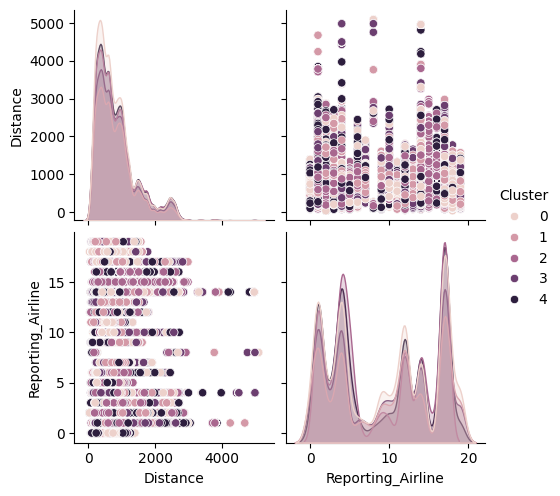

In [106]:
sns.pairplot(df_sample[["Distance", "Reporting_Airline", "Cluster"]], hue="Cluster")
plt.show()

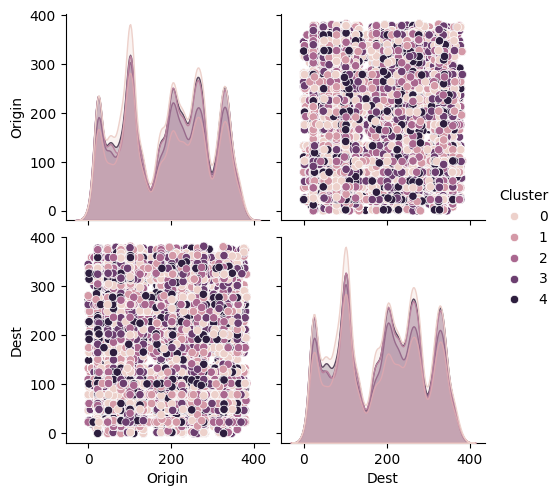

In [107]:
sns.pairplot(df_sample[["Origin", "Dest", "Cluster"]], hue="Cluster")
plt.show()

In [109]:
completeness = {
  "Year": 0.0,
  "Quarter": 0.0,
  "Month": 0.0,
  "DayofMonth": 0.0,
  "DayOfWeek": 0.0,
  "FlightDate": 0.0,
  "Reporting_Airline": 0.0,
  "Tail_Number": 0.22180000434427272,
  "Flight_Number_Reporting_Airline": 0.0,
  "OriginCityMarketID": 0.0,
  "Origin": 0.0,
  "DestCityMarketID": 0.0,
  "Dest": 0.0,
  "CRSDepTime": 0.0,
  "DepTime": 1.6469232024714202,
  "DepDelay": 0.0,
  "DepDelayMinutes": 0.0,
  "DepDel15": 0.0,
  "DepartureDelayGroups": 1.6526124512639513,
  "DepTimeBlk": 0.0,
  "TaxiOut": 0.0,
  "WheelsOff": 1.6970370109843524,
  "WheelsOn": 1.7450190324201773,
  "TaxiIn": 0.0,
  "CRSArrTime": 0.0,
  "ArrTime": 1.7449988577790694,
  "ArrDelay": 0.0,
  "ArrDelayMinutes": 0.0,
  "ArrDel15": 0.0,
  "ArrivalDelayGroups": 1.9614324075885432,
  "ArrTimeBlk": 0.0,
  "Cancelled": 0.0,
  "CancellationCode": 98.29146344358394,
  "Diverted": 0.0,
  "CRSElapsedTime": 0.0,
  "ActualElapsedTime": 0.0,
  "AirTime": 0.0,
  "Flights": 0.0,
  "Distance": 0.0,
  "DistanceGroup": 0.0,
  "CarrierDelay": 0.0,
  "WeatherDelay": 0.0,
  "NASDelay": 0.0,
  "SecurityDelay": 0.0,
  "LateAircraftDelay": 0.0,
  "DivAirportLandings": 6.7248803694218885e-6,
  "N-NUMBER": 0.27665485351764707,
  "SERIAL NUMBER": 0.3446635686936106,
  "MFR MDL CODE": 0.3446635686936106,
  "ENG MFR MDL": 2.1935214788980315,
  "YEAR MFR": 2.636590222037393,
  "TYPE REGISTRANT": 0.5685213864309264,
  "NAME": 0.27665485351764707,
  "STREET": 0.30604258073202073,
  "STREET2": 60.976763319113125,
  "CITY": 0.30604258073202073,
  "STATE": 0.33265293235382315,
  "ZIP CODE": 0.30604258073202073,
  "REGION": 0.30604258073202073,
  "COUNTY": 0.33265293235382315,
  "COUNTRY": 0.30604258073202073,
  "LAST ACTION DATE": 0.3446635686936106,
  "CERT ISSUE DATE": 0.4112533341116262,
  "CERTIFICATION": 2.1641270268032886,
  "TYPE AIRCRAFT": 0.3446635686936106,
  "TYPE ENGINE": 0.3446635686936106,
  "STATUS CODE": 0.27665485351764707,
  "MODE S CODE": 0.27665485351764707,
  "FRACT OWNER": 99.94010821542993,
  "AIR WORTH DATE": 2.1555864287341224,
  "OTHER NAMES(1)": 99.41340886001643,
  "OTHER NAMES(2)": 100.0,
  "OTHER NAMES(3)": 100.0,
  "OTHER NAMES(4)": 100.0,
  "OTHER NAMES(5)": 100.0,
  "EXPIRATION DATE": 0.37263234615003626,
  "UNIQUE ID": 0.3446635686936106,
  "KIT MFR": 99.95528627042371,
  " KIT MODEL": 99.95528627042371,
  "MODE S CODE HEX": 0.5685213864309264,
  "CODE": 4.484009007842757,
  "MFR": 4.487270574821927,
  "MODEL": 4.487270574821927,
  "TYPE": 4.82376341386669,
  "HORSEPOWER": 4.487270574821927,
  "THRUST": 4.487270574821927,
  "CODE_aircraft": 0.3541927241770814,
  "MFR_aircraft": 0.35093115719791185,
  "MODEL_aircraft": 0.35093115719791185,
  "TYPE-ACFT": 0.35093115719791185,
  "TYPE-ENG": 0.35093115719791185,
  "AC-CAT": 0.35093115719791185,
  "BUILD-CERT-IND": 0.35093115719791185,
  "NO-ENG": 0.35093115719791185,
  "NO-SEATS": 0.35093115719791185,
  "AC-WEIGHT": 0.35093115719791185,
  "SPEED": 0.35093115719791185,
  "TC-DATA-SHEET": 74.16086438384326,
  "TC-DATA-HOLDER": 74.16086438384326,
  "faa_registration_origin": 0.27665485351764707,
  "Origin_DISPLAY_AIRPORT_NAME": 0.0,
  "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL": 0.0,
  "Origin_LATITUDE": 0.0,
  "Origin_LONGITUDE": 0.0,
  "Dest_DISPLAY_AIRPORT_NAME": 0.0,
  "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL": 0.0,
  "Dest_LATITUDE": 0.0,
  "Dest_LONGITUDE": 0.0
}


In [113]:
remove = {}

for feature, comp in completeness.items():
    if comp > 5:
        remove[feature] = comp

remove

{'CancellationCode': 98.29146344358394,
 'STREET2': 60.976763319113125,
 'FRACT OWNER': 99.94010821542993,
 'OTHER NAMES(1)': 99.41340886001643,
 'OTHER NAMES(2)': 100.0,
 'OTHER NAMES(3)': 100.0,
 'OTHER NAMES(4)': 100.0,
 'OTHER NAMES(5)': 100.0,
 'KIT MFR': 99.95528627042371,
 ' KIT MODEL': 99.95528627042371,
 'TC-DATA-SHEET': 74.16086438384326,
 'TC-DATA-HOLDER': 74.16086438384326}

In [115]:
set(completeness.keys()) - set(remove.keys())

{'AC-CAT',
 'AC-WEIGHT',
 'AIR WORTH DATE',
 'ActualElapsedTime',
 'AirTime',
 'ArrDel15',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrTime',
 'ArrTimeBlk',
 'ArrivalDelayGroups',
 'BUILD-CERT-IND',
 'CERT ISSUE DATE',
 'CERTIFICATION',
 'CITY',
 'CODE',
 'CODE_aircraft',
 'COUNTRY',
 'COUNTY',
 'CRSArrTime',
 'CRSDepTime',
 'CRSElapsedTime',
 'Cancelled',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDel15',
 'DepDelay',
 'DepDelayMinutes',
 'DepTime',
 'DepTimeBlk',
 'DepartureDelayGroups',
 'Dest',
 'DestCityMarketID',
 'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL',
 'Dest_DISPLAY_AIRPORT_NAME',
 'Dest_LATITUDE',
 'Dest_LONGITUDE',
 'Distance',
 'DistanceGroup',
 'DivAirportLandings',
 'Diverted',
 'ENG MFR MDL',
 'EXPIRATION DATE',
 'FlightDate',
 'Flight_Number_Reporting_Airline',
 'Flights',
 'HORSEPOWER',
 'LAST ACTION DATE',
 'LateAircraftDelay',
 'MFR',
 'MFR MDL CODE',
 'MFR_aircraft',
 'MODE S CODE',
 'MODE S CODE HEX',
 'MODEL',
 'MODEL_aircraft',
 'Month',
 'N-NUMBER',
 'NAME',
 'N

In [ ]:
# remove cancelled, diverted (turned around) flights
df.drop(remove.keys(), axis="columns")

In [ ]:
df["delayed"] = (df["DepDelay"].gt(0)) | (df["ArrDelay"].ge(0))

In [ ]:
[
  # temporal data
  # Take the Month and day of the week, if we expect to see some predictive power in the date it probably involves the temporal rhythm of seasonality or the shorter rhythm of the weekly routine. We shrunk the dataset down to only two years so not much is given by the year column, quarter is another encoding of month, DayofMonth doesn't deliver much information unless it happens to be the 25th day of the 12th month, for example. and the FlightDate is a timestamp, a combination of all of these values.
  # "Year",
  # "Quarter",
  "Month",
  # "DayofMonth",
  "DayOfWeek",
  # "FlightDate",
  # Identifying the categorical airline
  "Reporting_Airline",
  # This may identify the route per airline, but we have the origin/destination airports, as well as the distance
  # "Flight_Number_Reporting_Airline",
  # Identifying the individual aircraft
  "Tail_Number",
  # Scratching the origin and destination airports in lieu of latitude and longitude values, this gives us slightly more information even though it's split up into two features we expect to see similarities for northern vs southern airports, especially in winter months
  # "OriginCityMarketID",
  # "Origin",
  # "DestCityMarketID",
  # "Dest",
  #   "Origin_DISPLAY_AIRPORT_NAME",
  # "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL",
  "Origin_LATITUDE",
  "Origin_LONGITUDE",
  # "Dest_DISPLAY_AIRPORT_NAME",
  # "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL",
  "Dest_LATITUDE",
  "Dest_LONGITUDE",
  # Flight timing
  # CRS is Computer Reservation System, this is the planned departure and arrival time, any delay can be calculated by the difference between this and the actual
  # For supervised learning, the delay will be our dependent variable, it will be an OR combination of departure delay and arrival delay, if either are true, we consider the label delayed
  "CRSDepTime",
  # "DepTime",
  # "DepDelay", # Create delayed label from this
  # "DepDelayMinutes",
  # "DepDel15",
  # "DepartureDelayGroups",
  # "DepTimeBlk",
  # "TaxiOut",
  # "WheelsOff",
  # "WheelsOn",
  # "TaxiIn",
  "CRSArrTime",
  # "ArrTime",
  # "ArrDelay", # Create delayed label from this
  # "ArrDelayMinutes",
  # "ArrDel15",
  # "ArrivalDelayGroups",
  # "ArrTimeBlk",
  # Remove cancelled and diverted flights
  # "Cancelled",
  # "Diverted",
  # This is just the difference between the planned departure and arrival
  # "CRSElapsedTime",
  # This encodes some factor of the delay
  # "ActualElapsedTime",
  # "AirTime",
  # Flights is always 1
  # "Flights",
  # We may see some benefit of using the group vs the raw distance here, experimentation needed, we might only care if it is a short, medium, or long distance flight
  # "Distance",
  "DistanceGroup",
  # The reason for the delay, we can't include this in the supervised learning model
  # "CarrierDelay",
  # "WeatherDelay",
  # "NASDelay",
  # "SecurityDelay",
  # "LateAircraftDelay",
  # Only matters for diversions, which we're filtering off
  # "DivAirportLandings",
  # Duplicate
  # "N-NUMBER",
  # Granular aircraft data
  # "SERIAL NUMBER",
  # "MFR MDL CODE",
  # "ENG MFR MDL",
  "YEAR MFR",
  "TYPE REGISTRANT",
  "NAME",
  # The registrants address and registration information
  # "STREET",
  # "CITY",
  # "STATE",
  # "ZIP CODE",
  # "REGION",
  # "COUNTY",
  # "COUNTRY",
  # "LAST ACTION DATE",
  # "CERT ISSUE DATE",
  # "CERTIFICATION",
  # Only 5 could be plausible
  # 1 - Glider
  # 2 - Balloon
  # 3 - Blimp/Dirigible
  # 4 - Fixed wing single engine
  #     5 - Fixed wing multi engine
  # 6 - Rotorcraft
  # 7 - Weight-shift-control
  # 8 - Powered Parachute
  # 9 - Gyroplane
  # H - Hybrid Lift
  # O - Other
  # "TYPE AIRCRAFT",
  # Only 5 could be plausible
  # 0 - None
  # 1 - Reciprocating
  # 2 - Turbo-prop
  # 3 - Turbo-shaft
  # 4 - Turbo-jet
  #     5 - Turbo-fan
  # 6 - Ramjet
  # 7 - 2 Cycle
  # 8 - 4 Cycle
  # 9 – Unknown
  # 10 – Electric
  # 11 - Rotary
  # "TYPE ENGINE",
  # "STATUS CODE",
  # "MODE S CODE",
  # "AIR WORTH DATE",
  # "EXPIRATION DATE",
  # "UNIQUE ID",
  # "MODE S CODE HEX",
  # "CODE",
  "MFR", # this is the engine manufacturer, unsure about its utility
  "MODEL",
  # "TYPE",
  # horsepower and thrust aren't very complete, and they are properly encoded as the aircraft model
  # "HORSEPOWER",
  # "THRUST",
  # "CODE_aircraft",
  "MFR_aircraft",
  "MODEL_aircraft"
  # "TYPE-ACFT",
  # "TYPE-ENG",
  # "AC-CAT",
  # "BUILD-CERT-IND",
  # "NO-ENG",
  # Seats is encoded in the model
  # "NO-SEATS",
  # "AC-WEIGHT",
  # "SPEED",
  # "faa_registration_origin"
]


In [ ]:
df_features = df_features.rename(
    columns={
        "MFR": "engine_manufacturer",
        "MODEL": "engine_model",
        "MFR_aircraft": "aircraft_manufacturer",
        "MODEL_aircraft": "aircraft_model",
    }
)

df_features

In [ ]:
('Month', 1.7087767541038772),
# ('AirTime', 0.3869686464135038),
('CRSElapsedTime', -0.2980440784837818),
('CRSDepTime', -0.15773386403138698),
('DayofMonth', 0.14953855937570498),
# ('TaxiOut', 0.1253333359351363),
('Distance', -0.10405990880510974),
# ('WheelsOff', 0.07302952261566129),
# ('WheelsOn', -0.055226493624705913),
# ('TaxiIn', 0.04761889028839386),
('CRSArrTime', -0.04742167651912536),
('Quarter', -0.034754548096689486),
# ('DepTimeBlk', 0.02811534655439366), # Same as CRSDepTime, just a block of time
('faa_registration_origin', 0.023883763484739313),
('CERTIFICATION', -0.02210820363716748),
# ('ArrTimeBlk', 0.021544201968830647), # Same as CRSArrTime, just a block of time
('BUILD-CERT-IND', -0.018295149655276226), # FAA??? 0 – Type Certificated, 1 – Not Type Certificated
('DistanceGroup', 0.017451266851290153),
('FlightDate', -0.016432542656731646), # This might be correlated with a "BAD WEATHER" day
('YEAR MFR', -0.014884302568005192),
('TYPE', -0.014866794268117834),
('THRUST', 0.01358547500217567),
('TYPE REGISTRANT', -0.013152544639214992),
('MFR_aircraft', -0.010890719736875745),
('Dest_LONGITUDE', 0.009813686216137832),
('Dest_LATITUDE', 0.008471088715595834),
('HORSEPOWER', 0.007734246598939018),
('MODEL_aircraft', 0.006796133972639018),
('MFR', 0.004374038500976201),
('STATUS CODE', 0.003167483566853517),
('CODE_aircraft', -0.003100004077941782),
('MFR MDL CODE', -0.003100004031407871),
('Origin_LATITUDE', 0.0026640933695089223),
('DayOfWeek', 0.0020502240851642687),
('NAME', 0.0016363765701174324),
('Origin_LONGITUDE', -0.0013126652773001106),
('N-NUMBER', -0.001259369656471249),
('Tail_Number', -0.0012593691495962438),
('MODE S CODE', 0.001258352308108148),
('MODE S CODE HEX', 0.0012583501823235032),
('MODEL', -0.0012306085665352703),
('TYPE-ENG', 0.0007853525503215068),
('TYPE ENGINE', 0.000785352550204981),
('ENG MFR MDL', 0.0006363760283277552),
('CODE', 0.0006363759944802538),
('DestCityMarketID', 0.0003297547472288426),
('Origin_DISPLAY_AIRPORT_CITY_NAME_FULL', -0.0002837582186398463),
('Origin_DISPLAY_AIRPORT_NAME', 0.00023590776712141458),
('Dest_DISPLAY_AIRPORT_NAME', 0.00019070457129613874),
('NO-SEATS', -0.00016486333701653852),
('Dest', -0.0001217653427366242)

In [ ]:
('Month', 1.8255524903821025),
('CRSElapsedTime', 0.18613789139153278),
('Distance', -0.17929722490460454),
('DayofMonth', 0.15995063956129815),
('CRSDepTime', 0.043673175189756136),
('Quarter', -0.040344945842545485),
('CRSArrTime', 0.03249675828507698),
('THRUST', 0.01995761220055595),
('Dest_LONGITUDE', 0.01855104260769445),
('FlightDate', -0.01752330819170784),
('TYPE', -0.01584535810463908),
('YEAR MFR', -0.014997270837507983),
('CERTIFICATION', -0.01402042326456107),
('TYPE REGISTRANT', -0.011957211433001894),
('BUILD-CERT-IND', 0.011174928813209155),
('faa_registration_origin', 0.010459185538337417),
('Dest_LATITUDE', 0.010359772341095077),
('Origin_LATITUDE', 0.010186238996101472),
('HORSEPOWER', 0.009521930681669935),
('MFR_aircraft', -0.006666808036411635),
('MODEL_aircraft', 0.006261433783998375),
('NO-SEATS', 0.0051068204591422596),
('STATUS CODE', -0.004624837677032775),
('MFR', 0.0039650668181873015),
('Origin_LONGITUDE', -0.003505904862843717),
('CODE_aircraft', -0.002835315991413994),
('MFR MDL CODE', -0.0028353159395312936),
('TYPE-ENG', 0.0021851408645572504),
('TYPE ENGINE', 0.002185140862648394),
('DistanceGroup', -0.0021632778790130988),
('MODEL', -0.0019942423569834795),
('ENG MFR MDL', 0.0011987080424272988),
('CODE', 0.0011987079702377543),
('MODE S CODE', 0.0011958151816422386),
('MODE S CODE HEX', 0.0011958137156764291),
('N-NUMBER', -0.0011943778731405162),
('Tail_Number', -0.0011943755022172434),
('NAME', 0.0009095049115895589),
('DestCityMarketID', 0.0004699722212393766),
('DayOfWeek', -0.0004574800915705131),
('Dest_DISPLAY_AIRPORT_NAME', 0.000290008685591187),
('Origin_DISPLAY_AIRPORT_CITY_NAME_FULL', -0.00027166111220312274),
('Dest', -0.0002177732093195993),
('Origin', 0.00012832371488339427),
('Origin_DISPLAY_AIRPORT_NAME', 0.00012016601265844423),
('Dest_DISPLAY_AIRPORT_CITY_NAME_FULL', -9.265960681889993e-05)

In [ ]:
num_cols = [
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "CRSDepTime",
    "CRSArrTime",
    "CRSElapsedTime",
    "Distance",
    "DistanceGroup",
    "YEAR MFR",
    "HORSEPOWER",
    "THRUST",
    "NO-SEATS",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "FlightDate",
    "Tail_Number",
    # 'Flight_Number_Reporting_Airline',
    # 'OriginCityMarketID',
    "Origin",
    "DestCityMarketID",
    "Dest",
    "N-NUMBER",
    # 'SERIAL NUMBER',
    "MFR MDL CODE",
    "ENG MFR MDL",
    "TYPE REGISTRANT",
    "NAME",
    # 'LAST ACTION DATE',
    # 'CERT ISSUE DATE',
    "CERTIFICATION",
    "TYPE ENGINE",
    "STATUS CODE",
    "MODE S CODE",
    # 'AIR WORTH DATE',
    # 'EXPIRATION DATE',
    # 'UNIQUE ID',
    "MODE S CODE HEX",
    "CODE",
    "MFR",
    "MODEL",
    "TYPE",
    "CODE_aircraft",
    "MFR_aircraft",
    "MODEL_aircraft",
    "TYPE-ENG",
    "BUILD-CERT-IND",
    "faa_registration_origin",
    "Origin_DISPLAY_AIRPORT_NAME",
    "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL",
    "Dest_DISPLAY_AIRPORT_NAME",
    "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL",
]